#### Carregando a base de dados

In [2]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_census.pkl', mode = 'rb') as arquivo:
    p_treinamento, c_treinamento, p_teste, c_teste = pickle.load( arquivo )

In [3]:
p_treinamento.shape, c_treinamento.shape

((27676, 108), (27676,))

In [4]:
p_teste.shape, c_teste.shape

((4885, 108), (4885,))

#### Aplicação do aprendizado

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelo = LogisticRegression( random_state=1 )
modelo.fit( p_treinamento, c_treinamento )

LogisticRegression(random_state=1)

In [6]:
previsao = modelo.predict( p_teste )

In [7]:
print(f'Precisão do modelo: {accuracy_score( c_teste, previsao)*100:.2f}%')

Precisão do modelo: 84.95%


#### Visualizando resultados do modelo

In [8]:
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel
from sklearn.metrics import classification_report

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "<=50K>", 3.423 previsões estão corretas e 270 estão incorretas.**

<br>

**Para a classe ">50K", 727 previsões estão corretas e 465 estão incorretas.**

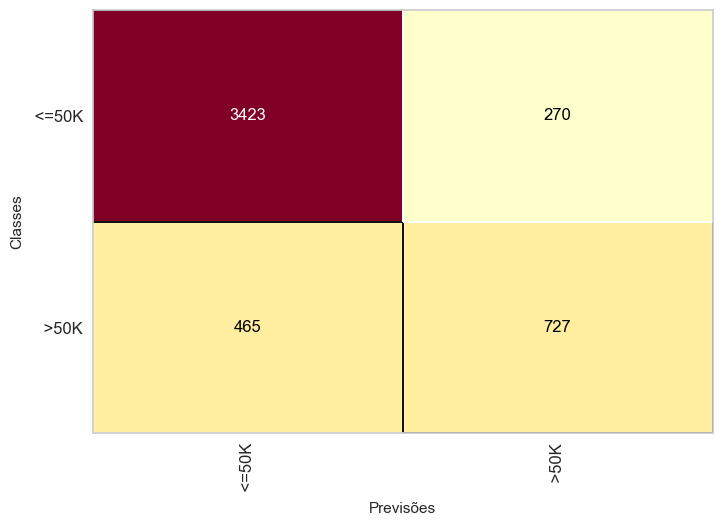

In [10]:
cm = ConfusionMatrix( modelo )
cm.fit( p_treinamento, c_treinamento )
cm.score( p_teste, c_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [11]:
print(classification_report( c_teste, previsao ))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

